Python - Marvel Mart Project   
Oliver Hering   
14 March 2021


In [6]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import zip_longest
pd.set_option('display.float_format', lambda x: '%.3f' % x)  
%config InlineBackend.print_figure_kwargs={'facecolor' : 'w'}

## Part 1: Cleaning the Data

1.test for missing values and change all to null or 0.   
2.find incorrect data and change to null or 0.   
3.remove all values that have null or 0.

In [7]:
df = pd.read_csv("DataSamples/MM_Sales.csv")

# This checks for missing values in each column and shows the count of how many are blank.
sumNA = df.isna().sum()
print(sumNA)
print(df.info())

Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          50000 non-null  object 
 1   Country         50000 non-null  object 
 2   Item Type       49994 non-null  object 
 3   Sales Channel   50000 non-null  object 
 4   Order Priority  49985 non-null  object 
 5   Order Date      50000 non-null  object 
 6   Order ID        50000 non-null  object 
 7   Ship Date       50000 non-null  object 
 8   Units Sold      50000 non-null  int64  
 9   Unit Price      50000 non-null  float64
 10  Unit Cost       50000 non-null  float64

In [16]:
# This establishes a new df that will hold our clean data.
# Also removes spaces in our column names.

dfClean = df.copy()
df.columns = df.columns.str.replace(' ', '')
dfClean.columns = dfClean.columns.str.replace(' ', '')

In [11]:
# Now we need to find the incorrect data and replace it with NULL or 0. 
# Country data will either be missing or be a number as a string.
# Item Type will either be missing or won't be a valid type like the others listed.
# Order Priority will either be missing or won't be a code 'C' 'H' 'M' 'L' or 'NULL'.
# Order ID will either be missing or won't be a number.

In [9]:
# This script replaces all empty values with either "NULL" or 0.

dfClean = df["Country"].fillna("NULL", inplace = True)
dfClean = df["ItemType"].fillna("NULL", inplace = True)
dfClean = df["OrderPriority"].fillna("NULL", inplace = True)
dfClean = df["OrderID"].fillna(0) 

# Now we can see that we have no missing values in our clean df.
sumNA_Clean = df.isna().sum()
print(sumNA_Clean)

Region           0
Country          0
ItemType         0
SalesChannel     0
OrderPriority    0
OrderDate        0
OrderID          0
ShipDate         0
UnitsSold        0
UnitPrice        0
UnitCost         0
TotalRevenue     0
TotalCost        0
TotalProfit      0
dtype: int64


In [10]:
# Country
non_alphabetic_Country = df.Country.str.contains('[1-9]')
df.loc[non_alphabetic_Country]

# we can see that three rows have a number listed in the Country column; these will have to be changed to 'NULL'.

,Region,Country,ItemType,SalesChannel,OrderPriority,OrderDate,OrderID,ShipDate,UnitsSold,UnitPrice,UnitCost,TotalRevenue,TotalCost,TotalProfit
8116,Sub-Saharan Africa,154.06,Household,Online,M,6/26/17,475624597,7/20/17,6742,668.270,502.540,4505476.340,3388124.680,1117351.660
21183,Middle East and North Africa,437.2,Baby Food,Online,M,4/25/13,123139846,5/9/13,8672,255.280,159.420,2213788.160,1382490.240,831297.920
30583,Middle East and North Africa,651.21,Office Supplies,Online,H,3/17/17,939173400,3/28/17,1134,651.210,524.960,738472.140,595304.640,143167.500


In [17]:
# Here we are checking for incorrect data in the Country column, and changing it to NULL.

count = 0

print('\nTesting for erroneous data in Country')
for index, row in dfClean.iterrows():
    try:
        # try to convert each item to a float, if it succeeds, it is incorrect and must be changed to NULL.
        row.loc['Country'] = float(row.loc['Country'])
        dfClean.loc[int(index), 'Country'] = 'NULL'
        print(dfClean.loc[int(index), 'Country'])
        count+=1
    except:
        1==1
        
print(f'Number of erroneous Country values: {count}')


Testing for erroneous data in Country
NULL
NULL
NULL
Number of erroneous Country values: 3


In [11]:
# Order ID
non_numeric_OrderID = df.OrderID.str.contains('[a-z]')
df.loc[non_numeric_OrderID]

# here we see 5 rows with incorrect data listed in the Order ID column; we will replace these with 0s.

,Region,Country,ItemType,SalesChannel,OrderPriority,OrderDate,OrderID,ShipDate,UnitsSold,UnitPrice,UnitCost,TotalRevenue,TotalCost,TotalProfit
18738,Central America and the Caribbean,Dominica,Cosmetics,Offline,H,3/7/12,Cosmetics,4/18/12,1365,437.200,263.330,596778.000,359445.450,237332.550
19040,Asia,Philippines,Fruits,Online,H,7/7/13,Fruits,7/25/13,6052,9.330,6.920,56465.160,41879.840,14585.320
19302,Europe,Lithuania,Snacks,Online,L,12/27/12,Snacks,1/4/13,1203,152.580,97.440,183553.740,117220.320,66333.420
19472,Central America and the Caribbean,Saint Lucia,Meat,Offline,M,4/18/17,Meat,4/19/17,8468,421.890,364.690,3572564.520,3088194.920,484369.600
19473,Central America and the Caribbean,Guatemala,Snacks,Offline,H,12/20/13,Snacks,1/10/14,9053,152.580,97.440,1381306.740,882124.320,499182.420


In [14]:
# Here we are checking for incorrect data in the Order ID column, and changing it to 0. 
# If the value in the Order ID column can be changed to a float, it is a correct numerical data value.

count = 0

print('\nTesting for erroneous data in Order ID')
for index, row in dfClean.iterrows():
    try:
        # try to convert each item to a float, if it fails, it is incorrect and must be changed to 0.
        row.loc['OrderID'] = float(row.loc['OrderID'])
        1==1
    except:
        dfClean.loc[int(index), 'OrderID'] = 0
        print(dfClean.loc[int(index), 'OrderID'])
        count+=1
        
print(f'Number of erroneous OrderID values: {count}')


Testing for erroneous data in Order ID
0
0
0
0
0
Number of erroneous OrderID values: 5


In [14]:
# Item Type
df.groupby(['ItemType']).count()

# here we can see that there are no incorrect or uncommon Item Type values other than the NULL values.

,Region,Country,SalesChannel,OrderPriority,OrderDate,OrderID,ShipDate,UnitsSold,UnitPrice,UnitCost,TotalRevenue,TotalCost,TotalProfit
ItemType,,,,,,,,,,,,,
Baby Food,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078,4078
Beverages,4173,4173,4173,4173,4173,4173,4173,4173,4173,4173,4173,4173,4173
Cereal,4141,4141,4141,4141,4141,4141,4141,4141,4141,4141,4141,4141,4141
Clothes,4155,4155,4155,4155,4155,4155,4155,4155,4155,4155,4155,4155,4155
Cosmetics,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192,4192
Fruits,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221
Household,4138,4138,4138,4138,4138,4138,4138,4138,4138,4138,4138,4138,4138
Meat,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221
NULL,6,6,6,6,6,6,6,6,6,6,6,6,6


In [15]:
#Order Priority

df.groupby(['OrderPriority']).count()

# similar story with Order Priority. We can simply remove the NULL values.

,Region,Country,ItemType,SalesChannel,OrderDate,OrderID,ShipDate,UnitsSold,UnitPrice,UnitCost,TotalRevenue,TotalCost,TotalProfit
OrderPriority,,,,,,,,,,,,,
C,5013,5013,5013,5013,5013,5013,5013,5013,5013,5013,5013,5013,5013
H,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099,15099
L,9986,9986,9986,9986,9986,9986,9986,9986,9986,9986,9986,9986,9986
M,19887,19887,19887,19887,19887,19887,19887,19887,19887,19887,19887,19887,19887
NULL,15,15,15,15,15,15,15,15,15,15,15,15,15


In [214]:
# This block of code removes all rows where there is a NULL value in the Country, ItemType, or OrderPriority columns
# or a 0 in the OrderID column.

dfClean = dfClean[dfClean.Country != 'NULL']
dfClean = dfClean[dfClean.ItemType != 'NULL']
dfClean = dfClean[dfClean.OrderPriority != 'NULL']
dfClean = dfClean[dfClean.OrderID != 0]

dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49971 entries, 0 to 49970
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         49971 non-null  object 
 1   Country        49971 non-null  object 
 2   ItemType       49971 non-null  object 
 3   SalesChannel   49971 non-null  object 
 4   OrderPriority  49971 non-null  object 
 5   OrderDate      49971 non-null  object 
 6   OrderID        49971 non-null  int64  
 7   ShipDate       49971 non-null  object 
 8   UnitsSold      49971 non-null  int64  
 9   UnitPrice      49971 non-null  float64
 10  UnitCost       49971 non-null  float64
 11  TotalRevenue   49971 non-null  float64
 12  TotalCost      49971 non-null  float64
 13  TotalProfit    49971 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.7+ MB


In [14]:
# Final check for null and 0 values in our altered rows.

print(dfClean['Country'][dfClean['Country'] == 'NULL'].count())
print(dfClean['ItemType'][dfClean['ItemType'] == 'NULL'].count())
print(dfClean['OrderPriority'][dfClean['OrderPriority'] == 'NULL'].count())
print(dfClean['OrderID'][dfClean['OrderID'] == 0].count())

0
0
0
0


In [31]:
# Now we will finally write this new clean df to a new csv file called MM_Sales_clean.csv.
# index=False removes the index column when writing.

dfClean.to_csv('DataSamples/MM_Sales_clean.csv', index=False)

## Part 2: Data Analysis w/ Reports and Visualizations

Build a function to append to a file, or write to file; two different functions.

#### Question 1

1) 1. Visualizations

We want to know which countries we sell to the most so we can pick a new location to build a shipping center. Rank the Top 10 countries we sell to, most to least, along with the number of sales we've had with that country.

In [35]:
# This reads in our new clean csv and displays the top 10 countries by number of sale transactions.

dfClean = pd.read_csv('DataSamples/MM_Sales_clean.csv')

dfCountries = dfClean.groupby(['Country']).count()
transactions = dfCountries['OrderID']
top10 = transactions.nlargest(10)
print(top10)

Country
Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          314
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
South Sudan                         302
Name: OrderID, dtype: int64


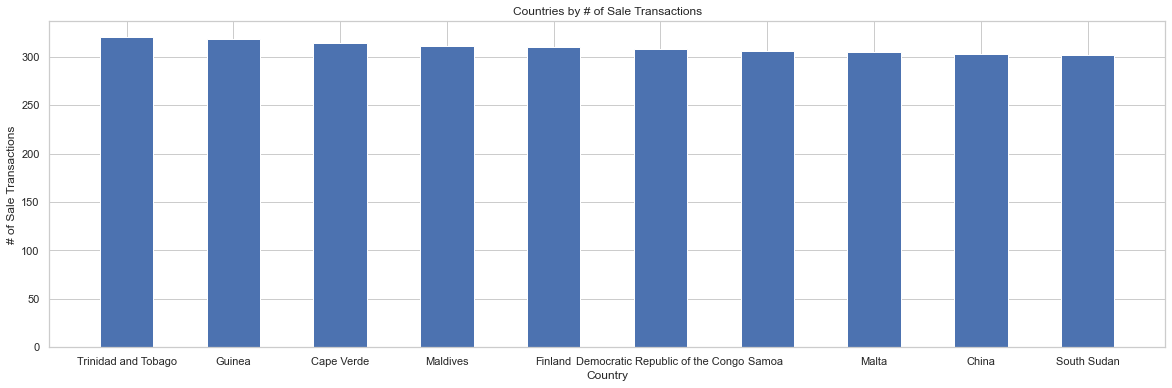

In [48]:
# Now we create a chart visualizing this data.

plt.figure(figsize=(20, 6))
plt.bar(top10.index, top10.values, align='center', width=0.5)
plt.title('Countries by # of Sale Transactions')
plt.xlabel('Country')
plt.ylabel('# of Sale Transactions')
plt.show()

We have shipping centers in Trinidad and Tobago, Guinea, and Maldives right now. Based on our results, it would be most logical to build a shipping center in Cape Verde, Finland, or the DRC. The first choice would probably be Finland or DRC because Cape Verde is relatively close to Guinea which already has a shipping center.

1) 2. Writing the results to a text file

In [2]:
# Creating a new MM_Rankings.txt file and appending to it.

with open('DataSamples/MM_Rankings.txt', 'a+') as writer:
    writer.write('Countries Most Sale Transactions:')
    writer.write('\n\n')

In [3]:
# Appending our results to the new file.

with open('DataSamples/MM_Rankings.txt', 'a+') as writer:
    writer.write('Trinidad and Tobago:  321 \n')
    writer.write('Guinea:  318 \n')
    writer.write('Cape Verde:  314 \n')
    writer.write('Maldives:  311 \n')
    writer.write('Finland:  310 \n')
    writer.write('DRC:  308 \n')
    writer.write('Samoa:  306 \n')
    writer.write('Malta:  305 \n')
    writer.write('China:  303 \n')
    writer.write('South Sudan:  302 \n')
    writer.write('We have shipping centers in Trinidad and Tobago, Guinea, and Maldives right now.\n') 
    writer.write('The country we should build our shipping center in is Finland because of its high relative number of orders and lack of shipping center nearby.\n')
    writer.write('The first choice would be Finland or the DRC because Cape Verde is relatively close to Guinea which already has a shipping center.\n\n\n')

#### Question 2

2) 1.

In [96]:
# Count of online and offline orders.

dfClean = pd.read_csv('DataSamples/MM_Sales_clean.csv')

salesChannel = dfClean.groupby(['SalesChannel']).count()
salesChannel['OrderID']

SalesChannel
Offline    19788
Online     30183
Name: OrderID, dtype: int64

2) 2.

In [106]:
# Count of different Order Priority types.

orderPriorityTypes = dfClean.groupby(['OrderPriority']).count()
orderPriorityTypes['OrderID'].sort_values(ascending=False)

OrderPriority
M    19881
H    15094
L     9984
C     5012
Name: OrderID, dtype: int64

2) 3.

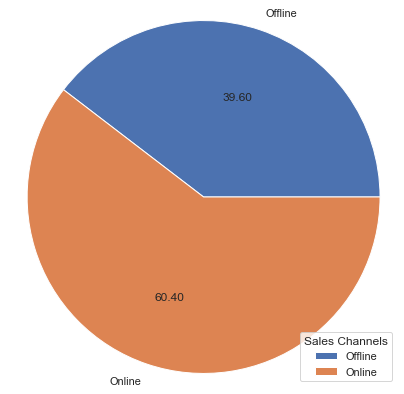

In [98]:
# Pie chart for Sales Channels.

plt.figure(figsize=(7, 7))
plt.pie(salesChannel['OrderID'], labels=salesChannel['OrderID'].index, autopct='%.2f')
plt.axis('equal')   #centers chart
plt.legend(loc=4, title='Sales Channels')
plt.show()

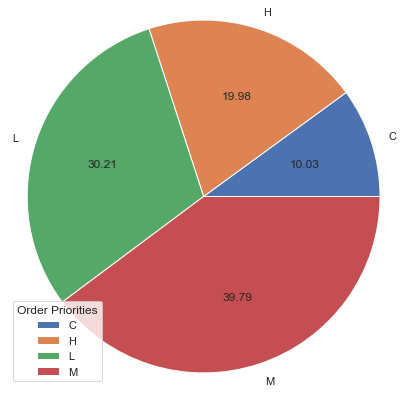

In [108]:
# Pie chart for Order Priorities

plt.figure(figsize=(7, 7))
plt.pie(orderPriorityTypes['OrderID'].sort_values(), labels=orderPriorityTypes['OrderID'].index, autopct='%.2f')
plt.axis('equal')   #centers chart
plt.legend(loc=3, title='Order Priorities')
plt.show()

2) 4.

In [4]:
# Adding the results to the MM_Rankings.txt file. 

with open('DataSamples/MM_Rankings.txt', 'a+') as writer:
    writer.write('Sales Channels:\n')
    writer.write('Online: 30183\n')
    writer.write('Offline: 19788\n')
    writer.write('We do more Online Sales.\n\n')
    writer.write('Order Priorities:\n')
    writer.write('L: 9984\n')
    writer.write('M: 19881\n')
    writer.write('H: 15094\n')
    writer.write('C: 5012\n')
    writer.write('We do more M order priorities\n\n')

#### Question 3

3) 1. 

/Users/oliverhering/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


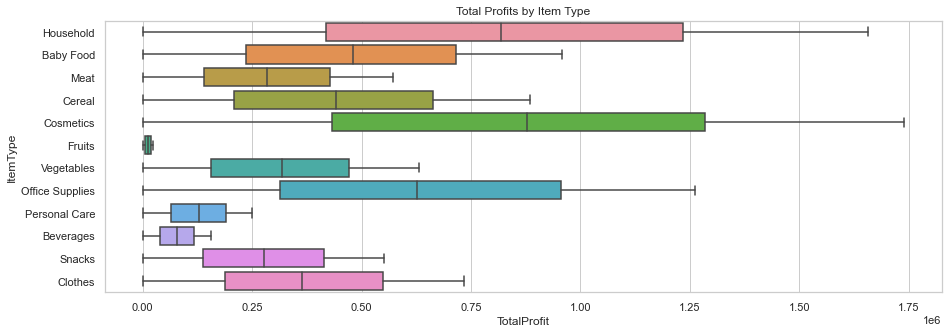

In [126]:
# Creating a seaborn boxplot showing the Total Profits distribution by Item Type.

dfClean = pd.read_csv('DataSamples/MM_Sales_clean.csv')

plt.figure(figsize=(15, 5))
plt.title('Total Profits by Item Type')
ax = sns.boxplot(dfClean.TotalProfit, dfClean.ItemType)

3) 2.

In [131]:
# Determining the sum of Total Profit by Item Type.

totalProfit = dfClean.groupby('ItemType').sum()
totalProfit['TotalProfit'].sort_values(ascending=False)

ItemType
Cosmetics         3638407966.750
Household         3401180998.060
Office Supplies   2605440187.500
Baby Food         1942865748.120
Cereal            1824726412.290
Clothes           1520832019.680
Vegetables        1322639660.240
Meat              1196342404.400
Snacks            1149715758.720
Personal Care      535250525.600
Beverages          327559249.080
Fruits              51010570.920
Name: TotalProfit, dtype: float64

3) 3.

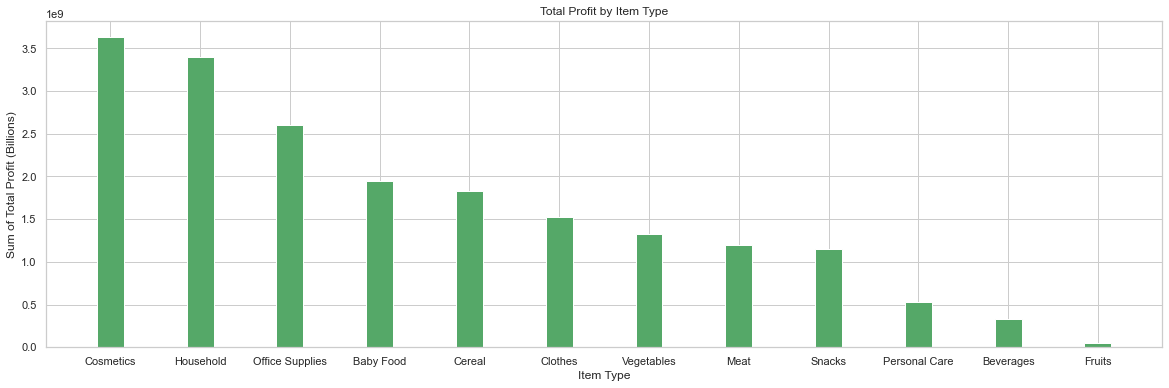

In [136]:
# Chart showing the above data.

plt.figure(figsize=(20, 6))
plt.bar(totalProfit['TotalProfit'].sort_values(ascending=False).index, totalProfit['TotalProfit'].sort_values(ascending=False).values, color='g', width=0.3)
plt.title('Total Profit by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sum of Total Profit (Billions)')
plt.show()

3) 4. 

In [137]:
# Ranking top 3 Item Types which brought in the most Total Profit.

totalProfit['TotalProfit'].nlargest(3)

ItemType
Cosmetics         3638407966.750
Household         3401180998.060
Office Supplies   2605440187.500
Name: TotalProfit, dtype: float64

3) 5.

In [5]:
# Add the results of the top 3 item types to the file MM_Rankings.txt.

with open('DataSamples/MM_Rankings.txt', 'a+') as writer:
    writer.write('Highest Selling Items:\n')
    writer.write('Item 1: Cosmetics\n')
    writer.write('Item 2: Household\n')
    writer.write('Item 3: Office Supplies\n')
    writer.write('We profited from Cosmetics the most.\n\n')

3) 6. 

A box plot is used to visualize the four quartiles of a set of data. The line in the center of the box represents the median of the data.    
The box represent the middle half of the data, from quartile 1 to quartile 3.   
The lines or whiskers that extend out represent the outer quarters of the data, usually containing the outliers.
A wider box represents a greater degree of dispersion in the data.   
This chart could be used to visualize the shape of our data; which types of items have the largest dispersion in profit, and what the median level of profit is for each type.   
We can use this information to potentially consolidate or expand prices depending on the respective dispersion.    
In this case, it appears that Fruit, Beverages, and Personal Care items bring in the lowest distribution of profit. We may want to evaluate if these products are worth selling.

#### Question 4

4) 1.

In [165]:
# Determines the sum for the Units Sold, Unit Cost, Total Revenue, Total Cost, and Total Profit.

dfClean = pd.read_csv('DataSamples/MM_Sales_clean.csv')

sum_list = list(dfClean)
sum_list.remove('Region')
sum_list.remove('Country')
sum_list.remove('ItemType')
sum_list.remove('SalesChannel')
sum_list.remove('OrderPriority')
sum_list.remove('OrderDate')
sum_list.remove('OrderID')
sum_list.remove('ShipDate')
sum_list.remove('UnitPrice')

dfClean[sum_list].sum()


UnitsSold        249818150.000
UnitCost           9360768.320
TotalRevenue   66145004417.170
TotalCost      46629032915.810
TotalProfit    19515971501.360
dtype: float64

4) 2.

In [171]:
# Produces the average of the requsted columns above.

dfClean[sum_list].mean()

UnitsSold         4999.263
UnitCost           187.324
TotalRevenue   1323667.816
TotalCost       933121.869
TotalProfit     390545.947
dtype: float64

4) 3.

In [190]:
# Produces the maximums for the requested columns.

dfClean[sum_list].max()

UnitsSold        10000.000
UnitCost           524.960
TotalRevenue   6682031.730
TotalCost      5249075.040
TotalProfit    1738178.390
dtype: float64

4) 4. 

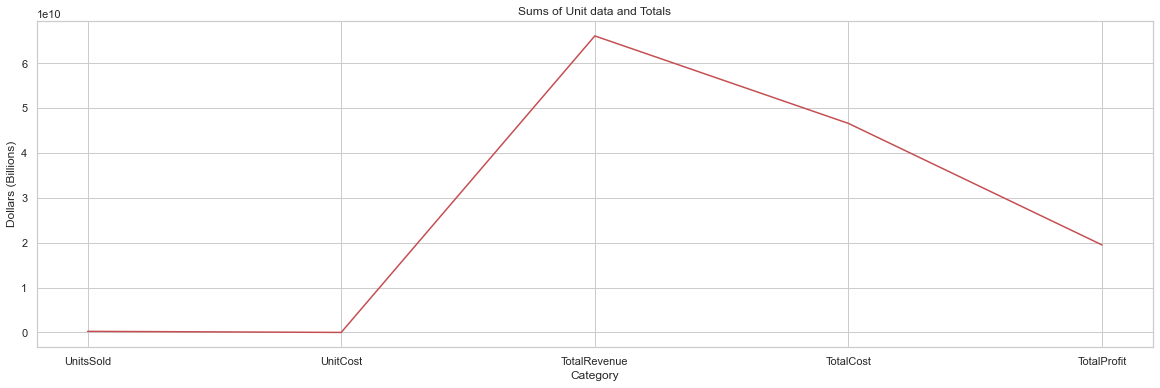

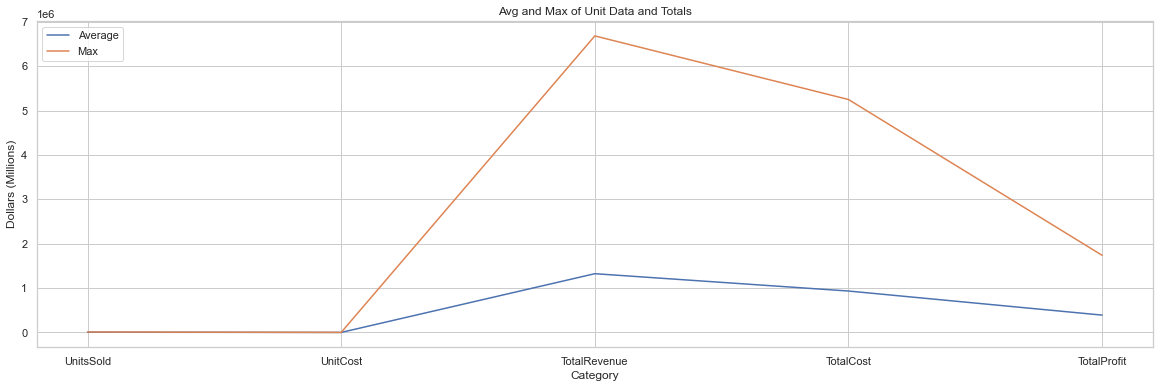

In [189]:
# Creates two line plots, one for the sums, and one for both the means and the maxes.

plt.figure(figsize=(20, 6))  #adjust width first, then height.
plt.plot(dfClean[sum_list].sum(), 'r-')  #first letter is color, second letter: o = dot chart.
plt.title('Sums of Unit data and Totals')
plt.xlabel('Category')
plt.ylabel('Dollars (Billions)')
plt.show()


x = dfClean[sum_list].mean()
y = dfClean[sum_list].max()

plt.figure(figsize=(20, 6))
plt.plot(x, label='Average')
plt.plot(y, label='Max')
plt.legend(loc="upper left")
plt.title('Avg and Max of Unit Data and Totals')
plt.xlabel('Category')
plt.ylabel('Dollars (Millions)')
plt.show()

4) 5.

In [191]:
# Saving these calculations into a new text file called MM_Calc.txt.

with open('DataSamples/MM_Calc.txt', 'a+') as writer:
    writer.write('Sums:\n')
    writer.write('Units Sold: 249,818,150\n')
    writer.write('Unit Cost: $ 9,360,768\n')
    writer.write('Total Revenue: $ 66,145,004,417\n')
    writer.write('Total Cost: $ 46,629,032,915\n')
    writer.write('Total Profit: $ 19,515,971,501\n\n')
    
    writer.write('Averages:\n')
    writer.write('Units Sold: 4999.263\n')
    writer.write('Unit Cost: $ 187.324\n')
    writer.write('Total Revenue: $ 1,323,667.816\n')
    writer.write('Total Cost: $ 933,121.869\n')
    writer.write('Total Profit: $ 390,545.947\n\n')
    
    writer.write('Maximums:\n')
    writer.write('Units Sold: 10000\n')
    writer.write('Unit Cost: $ 524.960\n')
    writer.write('Total Revenue: $ 6,682,031.730\n')
    writer.write('Total Cost: $ 5,249,075.040\n')
    writer.write('Total Profit: $ 1,738,178.390\n\n')

## Part 3: Cross-Reference Statistics

1.

In [299]:
# Here we are grouping our clean data frame by Region and then by Country. This will output as a dictionary with each region being a key and the countries being values.

regions = dfClean.groupby("Region")["Country"].apply(list).to_dict()
countries_regions = {k:list(set(v)) for k, v in regions.items()}
countries_regions

{'Asia': ['India',
  'Bangladesh',
  'Cambodia',
  'Laos',
  'Uzbekistan',
  'Kazakhstan',
  'North Korea',
  'Malaysia',
  'Mongolia',
  'Sri Lanka',
  'Kyrgyzstan',
  'Singapore',
  'Japan',
  'Tajikistan',
  'Philippines',
  'South Korea',
  'Maldives',
  'China',
  'Thailand',
  'Nepal',
  'Brunei',
  'Indonesia',
  'Taiwan',
  'Bhutan',
  'Myanmar',
  'Vietnam',
  'Turkmenistan'],
 'Australia and Oceania': ['Australia',
  'Samoa ',
  'Tonga',
  'Solomon Islands',
  'Papua New Guinea',
  'Vanuatu',
  'Fiji',
  'Marshall Islands',
  'Federated States of Micronesia',
  'East Timor',
  'Nauru',
  'New Zealand',
  'Kiribati',
  'Tuvalu',
  'Palau'],
 'Central America and the Caribbean': ['Honduras',
  'Saint Lucia',
  'El Salvador',
  'Cuba',
  'Panama',
  'Jamaica',
  'Haiti',
  'Nicaragua',
  'Trinidad and Tobago',
  'Antigua and Barbuda ',
  'Costa Rica',
  'Grenada',
  'The Bahamas',
  'Belize',
  'Guatemala',
  'Dominica',
  'Barbados',
  'Saint Kitts and Nevis ',
  'Dominican Rep

In [300]:
# Now we are writing our results to a csv file called Countries_By_Region.csv. We needed to use the zip_longest function here to allow us to zip our results together while filling in missing values.

d = countries_regions
with open("DataSamples/Countries_By_Region.csv", "w") as outfile:
   writer = csv.writer(outfile)
   writer.writerow(d.keys())
   writer.writerows(zip_longest(*d.values(), fillvalue=''))